# Import Libraries

In [114]:
# Import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, classification_report

# Import libraries for machine learning models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


# Import libraries for cross validation
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Import libraries for saving models
from sklearn.pipeline import Pipeline, make_pipeline
import pickle

# Read Data and EDA

In [2]:
# Read data
df = pd.read_csv('combined5.csv')

In [3]:
# check data
df.head()

,frame,pose_NOSE_x,pose_NOSE_y,pose_NOSE_z,pose_NOSE_visibility,pose_LEFT_EYE_x,pose_LEFT_EYE_y,pose_LEFT_EYE_z,pose_LEFT_EYE_visibility,pose_RIGHT_EYE_x,...,hand_right_RING_FINGER_TIP_y,hand_right_PINKY_MCP_x,hand_right_PINKY_MCP_y,hand_right_PINKY_PIP_x,hand_right_PINKY_PIP_y,hand_right_PINKY_DIP_x,hand_right_PINKY_DIP_y,hand_right_PINKY_TIP_x,hand_right_PINKY_TIP_y,Label
0,1,0.550595,0.184134,-0.225740,0.999390,0.560279,0.161174,-0.189114,0.999031,0.529116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
1,2,0.552678,0.185467,-0.175587,0.999365,0.561845,0.163136,-0.137902,0.999004,0.531556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
2,3,0.553467,0.185644,-0.159335,0.999257,0.563104,0.163612,-0.123313,0.998867,0.532347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
3,4,0.554047,0.185370,-0.176834,0.999187,0.564008,0.163597,-0.140386,0.998783,0.533256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence
4,5,0.554201,0.185123,-0.183257,0.999120,0.564500,0.163647,-0.146963,0.998725,0.533496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,silence


In [4]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Columns: 146 entries, frame to Label
dtypes: float64(144), int64(1), object(1)
memory usage: 5.7+ MB


In [5]:
# get summary
df.describe()

,frame,pose_NOSE_x,pose_NOSE_y,pose_NOSE_z,pose_NOSE_visibility,pose_LEFT_EYE_x,pose_LEFT_EYE_y,pose_LEFT_EYE_z,pose_LEFT_EYE_visibility,pose_RIGHT_EYE_x,...,hand_right_RING_FINGER_TIP_x,hand_right_RING_FINGER_TIP_y,hand_right_PINKY_MCP_x,hand_right_PINKY_MCP_y,hand_right_PINKY_PIP_x,hand_right_PINKY_PIP_y,hand_right_PINKY_DIP_x,hand_right_PINKY_DIP_y,hand_right_PINKY_TIP_x,hand_right_PINKY_TIP_y
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,...,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,68.543648,0.493018,0.195115,-0.285693,0.999890,0.511267,0.170927,-0.261171,0.999854,0.474821,...,0.600572,0.390793,0.601963,0.408220,0.603281,0.397020,0.604792,0.390924,0.606469,0.385566
std,41.989621,0.079328,0.049965,0.097808,0.000259,0.079323,0.049966,0.097077,0.000326,0.077282,...,0.179162,0.203830,0.170230,0.191497,0.174392,0.201030,0.176504,0.205926,0.178182,0.210257
min,1.000000,0.201593,0.108912,-0.581637,0.997050,0.215255,0.086373,-0.554180,0.996736,0.197089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.463542,0.153466,-0.351126,0.999908,0.482493,0.126857,-0.327038,0.999885,0.446358,...,0.522359,0.247980,0.541853,0.259090,0.536148,0.235188,0.534578,0.219663,0.533753,0.207413
50%,65.000000,0.491457,0.187565,-0.280786,0.999974,0.512888,0.163647,-0.258288,0.999965,0.470768,...,0.616186,0.350245,0.624058,0.373303,0.626900,0.356425,0.627888,0.350982,0.627696,0.352791
75%,104.000000,0.519844,0.238018,-0.217106,0.999993,0.540181,0.212125,-0.190967,0.999992,0.498631,...,0.703791,0.476743,0.701194,0.519892,0.708943,0.498565,0.712602,0.490551,0.716843,0.488238
max,149.000000,0.761661,0.316511,0.038356,1.000000,0.759793,0.288097,0.067401,1.000000,0.741684,...,1.004769,0.867124,0.962095,0.873313,0.977439,0.874460,0.987162,0.865075,0.995278,0.864347


In [6]:
# check missing values
df.isnull().sum()

frame                     0
pose_NOSE_x               0
pose_NOSE_y               0
pose_NOSE_z               0
pose_NOSE_visibility      0
                         ..
hand_right_PINKY_DIP_x    0
hand_right_PINKY_DIP_y    0
hand_right_PINKY_TIP_x    0
hand_right_PINKY_TIP_y    0
Label                     0
Length: 146, dtype: int64

In [11]:
# check duplicate values
df.duplicated().sum()

0

In [117]:
# check unique values
df.nunique()

frame                      149
pose_NOSE_x               5041
pose_NOSE_y               4986
pose_NOSE_z               5092
pose_NOSE_visibility       634
                          ... 
hand_right_PINKY_DIP_x    4594
hand_right_PINKY_DIP_y    4585
hand_right_PINKY_TIP_x    4590
hand_right_PINKY_TIP_y    4588
Label                        5
Length: 146, dtype: int64

In [9]:
# inspect label
df['Label'].value_counts()

Label
money      1028
ok         1027
silence    1026
welcome    1026
rock       1025
Name: count, dtype: int64

<Axes: xlabel='Label'>

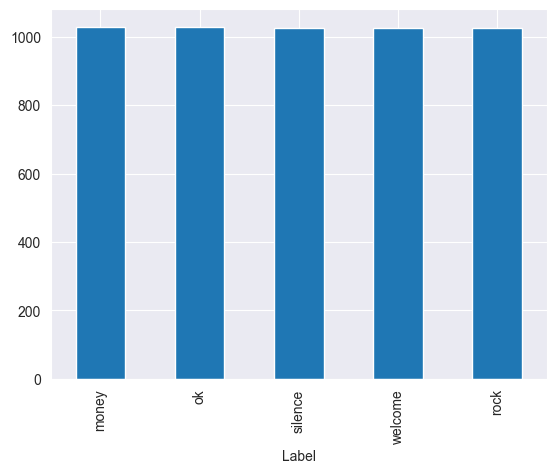

In [115]:
# plot label
df['Label'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

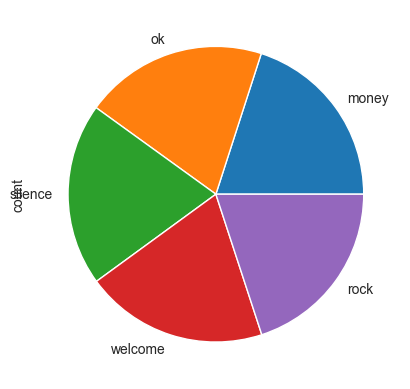

In [116]:
# plot label
df['Label'].value_counts().plot(kind='pie')

### Resume of EDA:

Based on the EDA, we can see that:
1. There are no missing values and duplicate values.
2. There are 5 unique labels.
3. The data is well balanced.

# Define X, y

In [44]:
# drop frame and label
X =df.drop(['Label', 'frame'], axis=1)
y = df['Label']

# Scale Data

In [45]:
# scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
# encode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split Data

In [55]:
# split data into train and test  sets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4105, 144), (1027, 144), (4105,), (1027,))

# Train Machine Learning Classification Models

In [49]:
# Define models
models = [
    RandomForestClassifier(n_estimators=50, random_state= 42), 
    LogisticRegression(random_state =42), 
    RidgeClassifier(random_state =42),
    GradientBoostingClassifier(learning_rate=0.3,n_estimators=50, random_state =42),
    XGBClassifier(random_state =42),
    KNeighborsClassifier()
]

In [96]:
# Define function to evaluate models using cross validation and return results in a DataFrame
def evaluate_models(X_train, y_train, models):
    skf = StratifiedKFold(n_splits=5)

    # Include additional scoring metrics
    scoring = {'accuracy': 'accuracy',
               'precision': 'precision_macro', 
               'recall': 'recall_macro', 
               'f1': 'f1_macro'}

    results = []

    for model in models:
        scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=skf, return_train_score=True)

        mean_accuracy = round(scores['test_accuracy'].mean(), 3)
        mean_precision = round(scores['test_precision'].mean(), 3)
        mean_recall = round(scores['test_recall'].mean(), 3)
        mean_f1 = round(scores['test_f1'].mean(), 3)
        mean_train_accuracy = round(np.mean(scores['train_accuracy']), 3)

        overfitting = (mean_train_accuracy - mean_accuracy) * 100

        # Store the model's parameters
        model_params = model.get_params()
        
        # Append the results
        model_metrics = {'Model': model.__class__.__name__,
                         'Accuracy': mean_accuracy,
                         'Precision': mean_precision,
                         'Recall': mean_recall,
                         'F1 Score': mean_f1,
                         'Overfitting': overfitting}
                        
        results.append(model_metrics)

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df


In [97]:
# Evaluate models
results_df = evaluate_models(X_train, y_train, models)

/Users/gala/PycharmProjects/Technical_task_Chiara/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gala/PycharmProjects/Technical_task_Chiara/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [98]:
# Print results
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Overfitting
0,RandomForestClassifier,0.997,0.997,0.997,0.997,0.3
1,LogisticRegression,0.997,0.997,0.997,0.997,0.2
2,RidgeClassifier,0.994,0.994,0.994,0.994,0.1
3,GradientBoostingClassifier,0.997,0.997,0.997,0.997,0.3
4,XGBClassifier,0.998,0.998,0.998,0.998,0.2
5,KNeighborsClassifier,0.993,0.993,0.993,0.993,0.1


# Evaluate Best Model

In [99]:
# Find the row with the minimum 'F1 Score' value (best model)
best_model_row = results_df.loc[results_df['F1 Score'].idxmax()]

# Print the results of the best model
result = tabulate(pd.DataFrame(best_model_row), headers='keys', tablefmt='rounded_grid', showindex=True)
print(result)

╭─────────────┬─────────────────────╮
│             │ 4                   │
├─────────────┼─────────────────────┤
│ Model       │ XGBClassifier       │
├─────────────┼─────────────────────┤
│ Accuracy    │ 0.998               │
├─────────────┼─────────────────────┤
│ Precision   │ 0.998               │
├─────────────┼─────────────────────┤
│ Recall      │ 0.998               │
├─────────────┼─────────────────────┤
│ F1 Score    │ 0.998               │
├─────────────┼─────────────────────┤
│ Overfitting │ 0.20000000000000018 │
╰─────────────┴─────────────────────╯


In [100]:
# the best model is XGBClassifier with F1 Score of 0.99
xgb = XGBClassifier(random_state =42)
# fit model
model_trained = xgb.fit(X_train, y_train)
model_trained

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Create Pipeline

In [101]:
# create pipeline for preprocessing
preprocessor = make_pipeline(StandardScaler())

In [106]:
# fit and transform training data
preprocessor.fit_transform(X_train)

array([[ 2.42746022,  1.2468281 , -0.38229477, ...,  0.54004374,
         0.88425854,  0.54074624],
       [-0.36864537,  0.85819718,  0.98485556, ..., -0.23926848,
        -0.91192243, -0.17720877],
       [-1.68080866,  0.07151024,  0.31386782, ...,  0.30172685,
        -1.20201443,  0.30715304],
       ...,
       [ 0.1717295 , -1.39944807, -0.99630946, ...,  0.33440922,
        -0.12046852,  0.38095623],
       [ 1.93814998,  1.68660677,  0.05722031, ...,  1.0967155 ,
        -0.30839507,  1.09202007],
       [ 1.59134658,  1.97770476,  1.05500432, ...,  2.2346962 ,
         0.03605718,  2.24036247]])

In [107]:
# Create pipeline that includes preprocessing and model
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model', model_trained)])
pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

# Save and Load Model

In [108]:
# Save pipeline
with open('gesture_classifier.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [131]:
# Load pipeline
with open('gesture_classifier.pkl', 'rb') as f:
    pipeline = pickle.load(f)

# Make Predictions

In [132]:
# Make predictions on test data
y_pred = pipeline.predict(X_test)

In [133]:
# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       209
           3       1.00      1.00      1.00       220
           4       1.00      1.00      1.00       198

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027


In [134]:
# Confusion matrix for predictions
cm = confusion_matrix(y_test, y_pred)

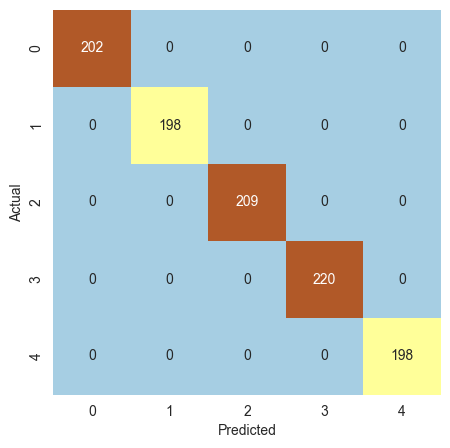

In [146]:
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap="Paired")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Results

In [128]:
# Make predictions on all data
y_pred_all = pipeline.predict(X)

In [129]:
# Create DataFrame of actual and predicted labels
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred_all})
results_df

,Actual,Predicted
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
5127,2,2
5128,2,2
5129,2,2
5130,2,2


# Resume of Model Performance:

Based on the results, we can see that:

1. Selected model is XGBClassifier. 
2. The model has 99% accuracy, precision, recall, and F1 score.
3. The model is not overfitting.
4. The model can predict all data correctly.
5. The model can predict all labels correctly.
6. Next step is to test the model on real-time data
7. Add more labels to the model